In [1]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv


load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")


llm = ChatOpenAI(openai_api_key=api_key, max_tokens=100, temperature=1)

/Users/monikabieniecka/Documents/malajka/ai-lib-effect/myenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a CPTSD Therapist with 20 plus years experience in healing people from CPTSD."),
    ("user", "{input}"),
    
])

chain = prompt | llm


In [3]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = chain | output_parser


In [4]:
import pdfplumber

def get_and_update_current_page(file_path, increment=2):
    try:
        with open(file_path, 'r') as file:
            current_page = int(file.read().strip())
    except FileNotFoundError:
        current_page = 0 

    new_current_page = current_page + increment

    with open(file_path, 'w') as file:
        file.write(str(new_current_page))

    return current_page, new_current_page

# Function to extract text from a specific section of the PDF
def extract_section_from_pdf(pdf_path, start_page, end_page):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        pages = pdf.pages[start_page:end_page]
        for page in pages:
            text += page.extract_text() + "\n"
    return text

# File to store current page number
current_page_file = 'current_page.txt'

start_page, next_start_page = get_and_update_current_page(current_page_file)


# Extract text from today's section
pdf_text = extract_section_from_pdf("CPTSD.pdf", start_page, next_start_page)

response = chain.invoke({"input": "write a 20 words supportive quote for a person suffering from cptsd that would heal them, from the following text" + pdf_text})

print(response)

quote=response

"You are on a gradual journey of healing from CPTSD. Trust the process and have patience with yourself."


In [5]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_openai import OpenAI

quote= response
print(quote)
llm = OpenAI(temperature=0.9)


prompt_template = PromptTemplate(
    input_variables=["quote"], 
    template="Generate an art that symbolizes inner strength, resilience, and mental harmony: {quote}",
)

chain = LLMChain(llm=llm, prompt=prompt_template)


input_data = {"quote": quote}

prompt = chain.run(input_data)
print(prompt)

len(prompt)
max_length = 1000
if len(prompt) >= max_length:
    prompt = prompt[:max_length]

print(len(prompt))

image_url = DallEAPIWrapper().run(prompt)

print(image_url)


"You are on a gradual journey of healing from CPTSD. Trust the process and have patience with yourself."


/Users/monikabieniecka/Documents/malajka/ai-lib-effect/myenv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




The art piece is a painting of a tree, representing growth and resilience. The tree stands tall and strong, with its roots deeply planted in the ground. The trunk of the tree is painted in shades of dark blue and purple, symbolizing the deep wounds and pain of CPTSD.

However, as the eyes move upwards, the colors gradually change to warmer tones of yellow, orange, and red, representing the healing and growth process. The branches of the tree reach out towards the sky, with delicate leaves painted in shades of green and blue, symbolizing mental harmony and stability.

In the background, there is a serene waterfall, representing the flowing and gradual journey of healing. The water cascades down the rocks, representing the release of pain and the cleansing of the mind.

Within the branches of the tree, there are small birds perched, representing strength and resilience. They are surrounded by delicate flowers and butterflies, symbolizing growth and transformation.

At the bottom of the

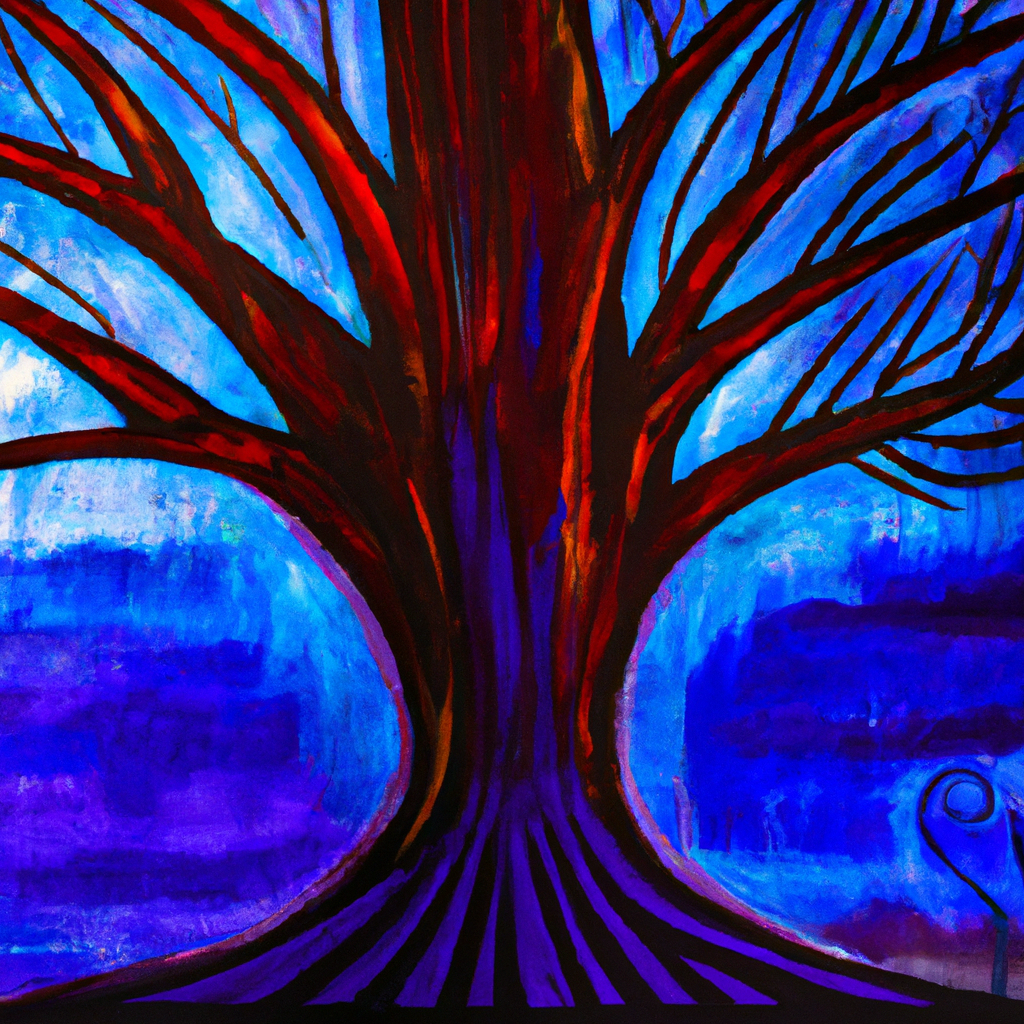

In [6]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import datetime


response = requests.get(image_url)
image_data = BytesIO(response.content)
image = Image.open(image_data)

display(image)

current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S%f")
filename = f"image_{current_time}.jpg"  

image.save("images/"+ filename)



In [7]:
print(prompt)



The art piece is a painting of a tree, representing growth and resilience. The tree stands tall and strong, with its roots deeply planted in the ground. The trunk of the tree is painted in shades of dark blue and purple, symbolizing the deep wounds and pain of CPTSD.

However, as the eyes move upwards, the colors gradually change to warmer tones of yellow, orange, and red, representing the healing and growth process. The branches of the tree reach out towards the sky, with delicate leaves painted in shades of green and blue, symbolizing mental harmony and stability.

In the background, there is a serene waterfall, representing the flowing and gradual journey of healing. The water cascades down the rocks, representing the release of pain and the cleansing of the mind.

Within the branches of the tree, there are small birds perched, representing strength and resilience. They are surrounded by delicate flowers and butterflies, symbolizing growth and transformation.

At the bottom of the

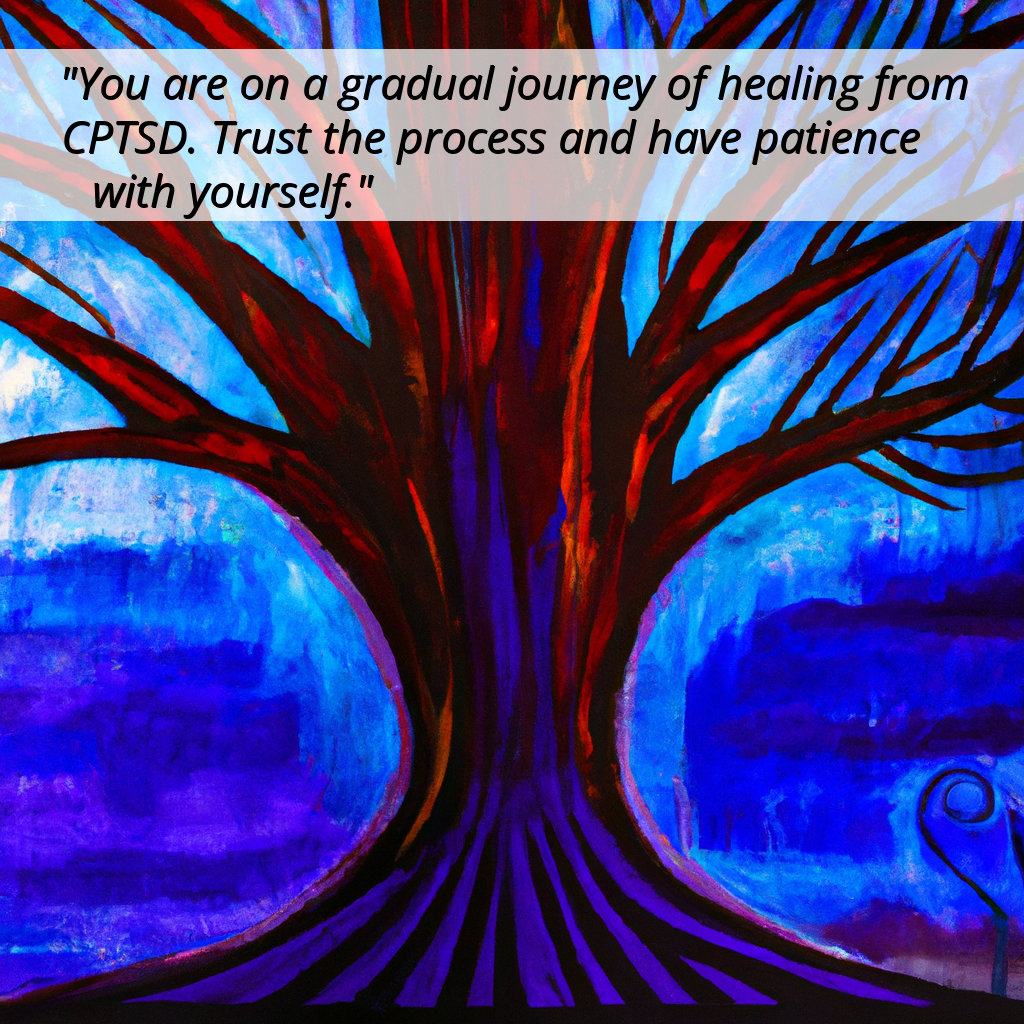

In [8]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import textwrap
import datetime


def draw_multiline_text_with_frosted_background(image, text, position, font, text_color, shadow_color, shadow_offset, line_spacing=1.2):
    draw = ImageDraw.Draw(image)
    lines = textwrap.wrap(text, width=45)

    x, y = position
    shadow_x, shadow_y = shadow_offset

    # Estimate the size of the frosted background
    # Assuming average character width is roughly half the font size (a rough estimation)
    average_char_width = font.size // 1
    max_text_width = max(len(line) for line in lines) * average_char_width
    line_height = int(font.size * line_spacing)
    total_text_height = len(lines) * line_height

    frosted_background_size = (max_text_width + 20, total_text_height + 10)  # Extra padding
    frosted_background_position = (x - 1, y - 1)

    # Create frosted background (semi-transparent rectangle)
    frosted_background = Image.new("RGBA", frosted_background_size, (255, 255, 255, 180))
    image.paste(frosted_background, frosted_background_position, frosted_background)

    for line in lines:
     # Calculate x-coordinate to center the text within the frosted background
        text_bbox = draw.textbbox((0, 0), line, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        x_centered = x + (max_text_width - text_width) / 19

  
        draw.text((x_centered + shadow_x, y + shadow_y), line, font=font, fill=shadow_color)
        
        draw.text((x_centered, y), line, font=font, fill=text_color)
        y += line_height  # Increment y position by line height


font_path = 'fonts/OpenSans-Bold.ttf'
my_font = ImageFont.truetype(font_path, 45)

shadow_color = "black"
shadow_offset = (1, 1)


# Use the function with frosted background
draw_multiline_text_with_frosted_background(image, quote, (0, 50), my_font, 'black', shadow_color, shadow_offset)

# Generate a unique filename with the current date and time
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"image_{current_time}.jpg"  # The file will be saved with a .jpg extension

# Save the image in the current directory with the generated filename
image.save("images/"+ filename)

display(image)